In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


In [2]:
# Loading the dataset
df= pd.read_csv('audit_risk.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [3]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [4]:
df['Money_Value'].fillna(value=df['Money_Value'].mean(), inplace=True)

In [5]:
x=df.drop('Risk', axis='columns')
y=df['Risk']

In [6]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


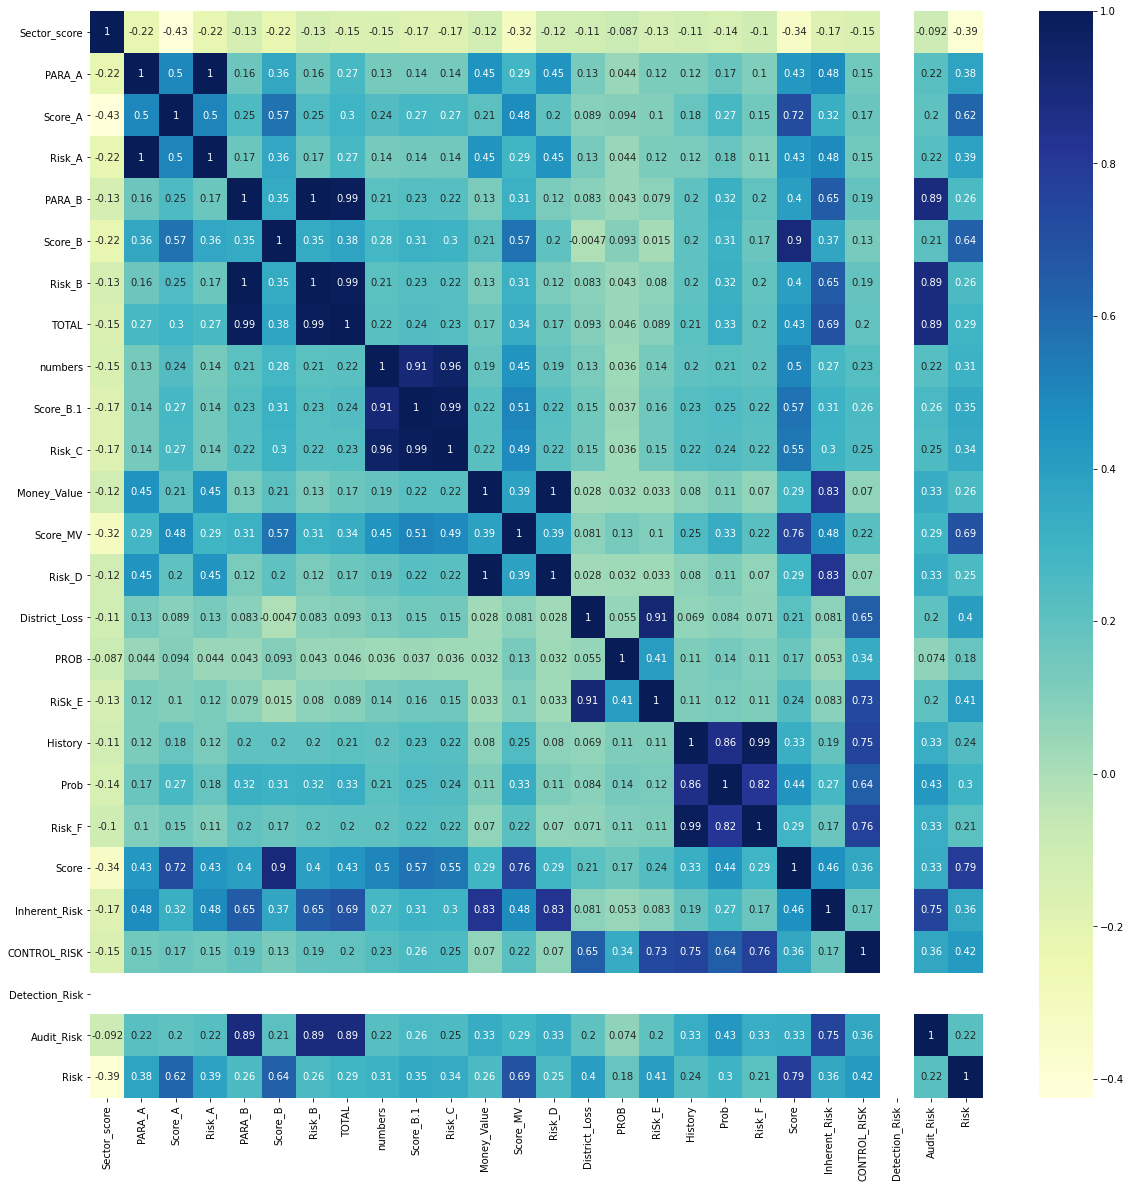

In [7]:
import seaborn as sns

correlation_matrix = df.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(20,20))

ax = sns.heatmap(df[top_corr_features].corr(), cmap="YlGnBu", annot = True)

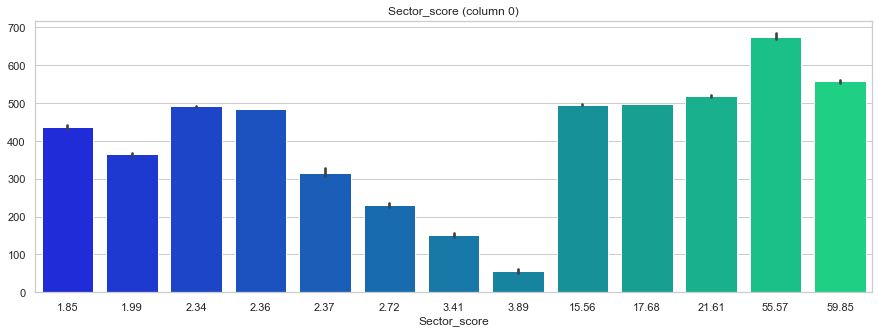

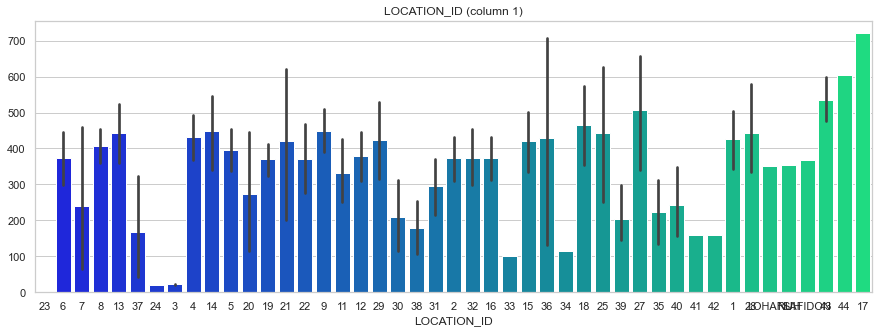

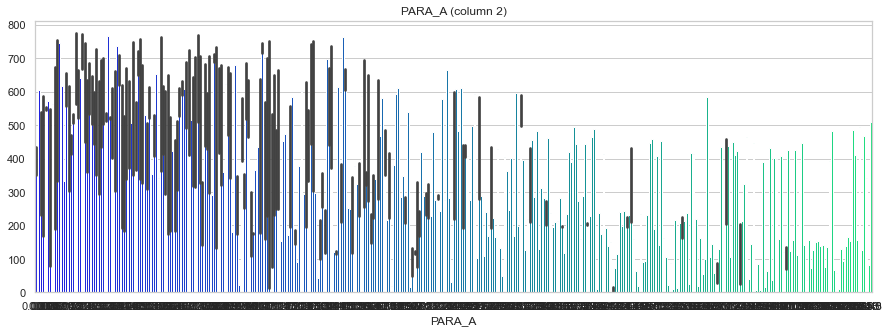

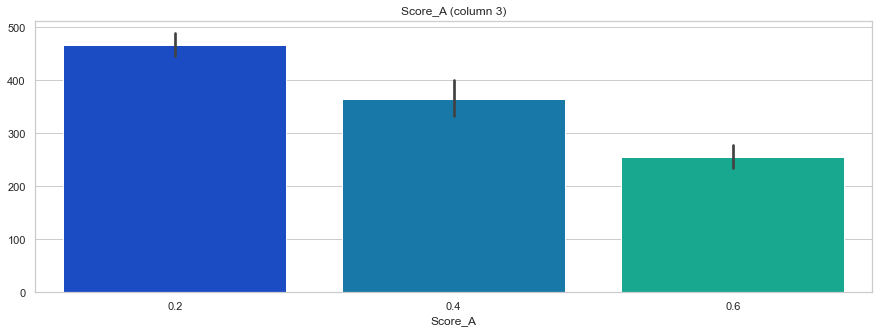

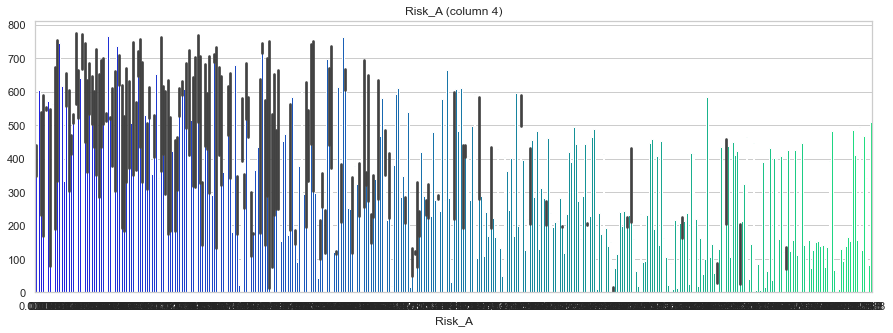

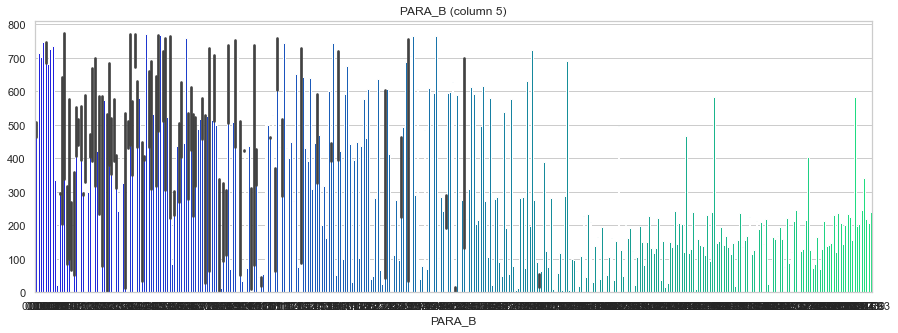

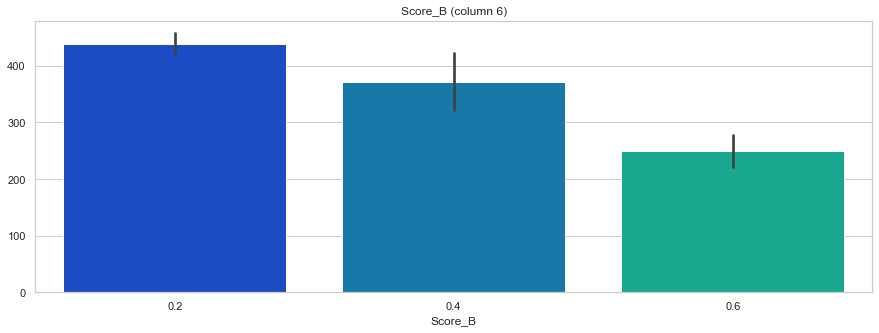

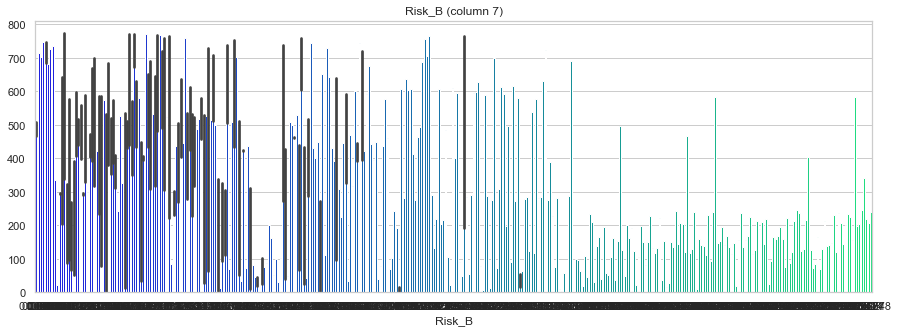

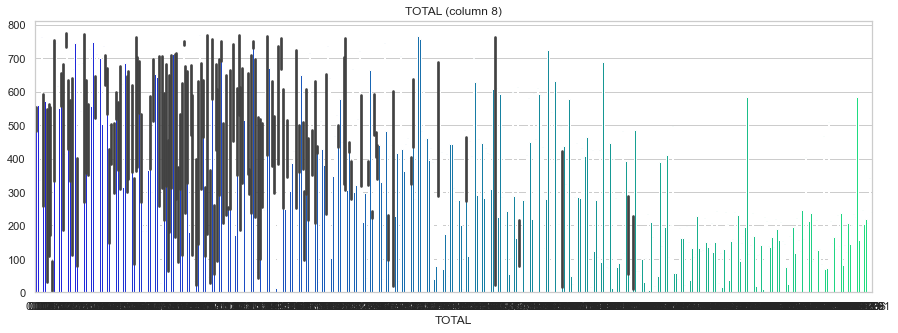

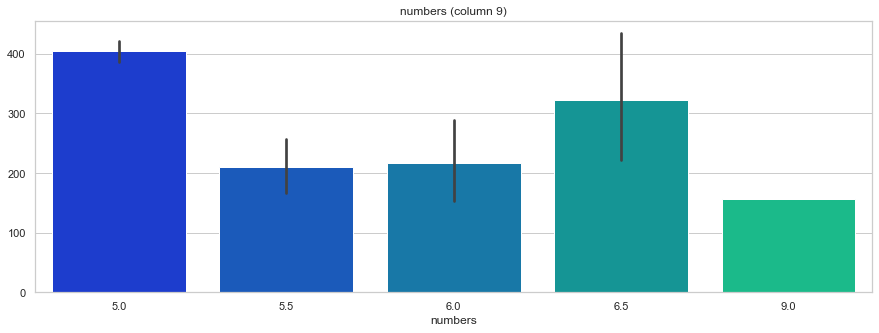

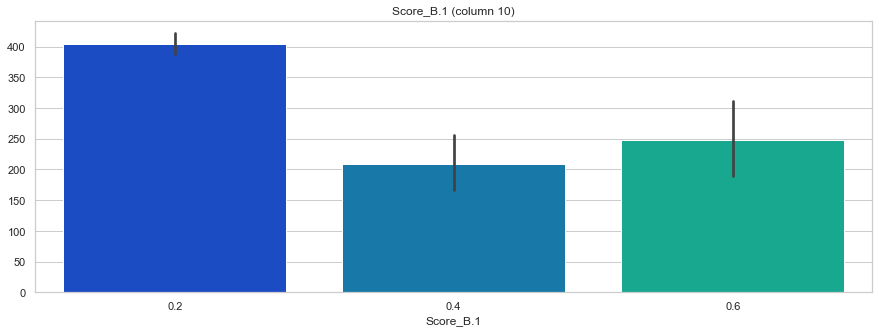

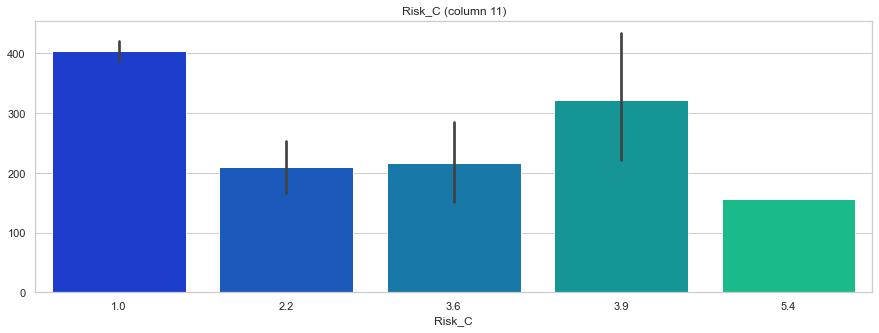

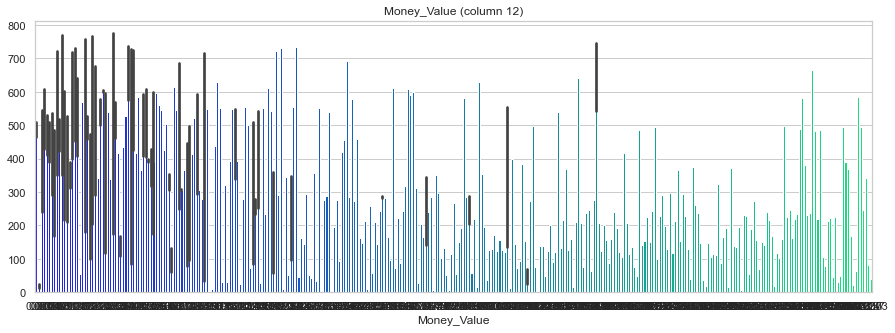

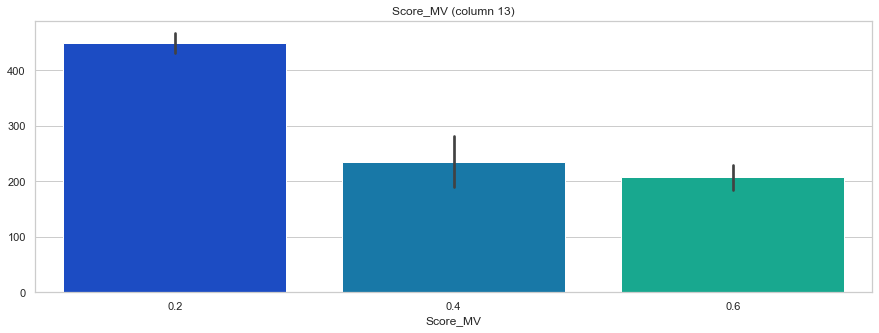

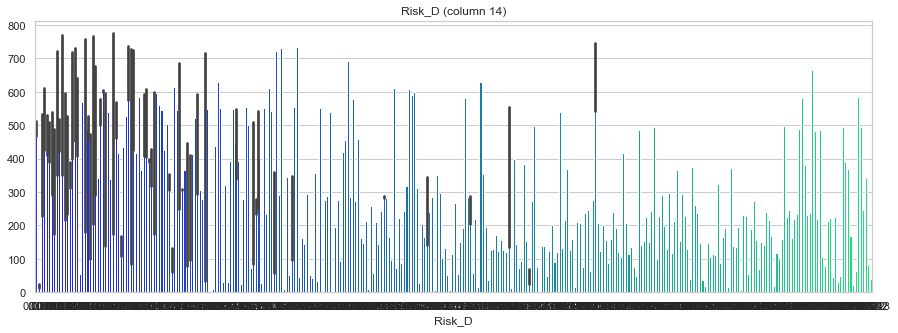

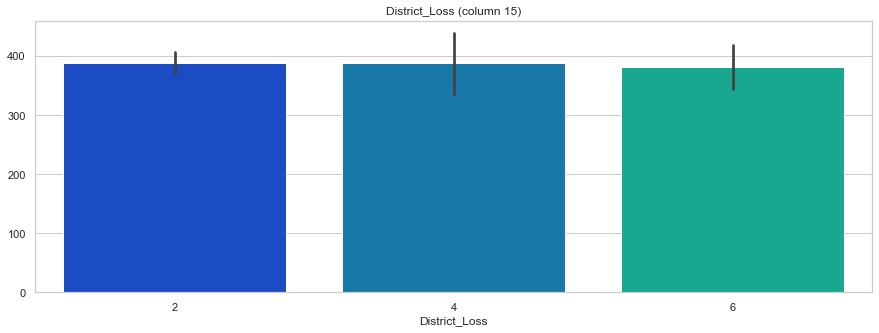

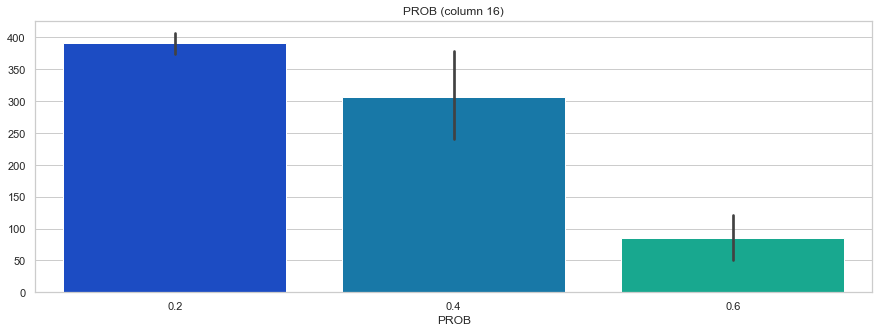

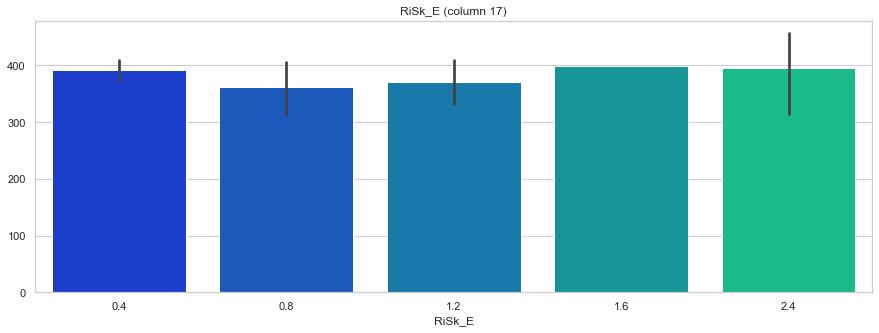

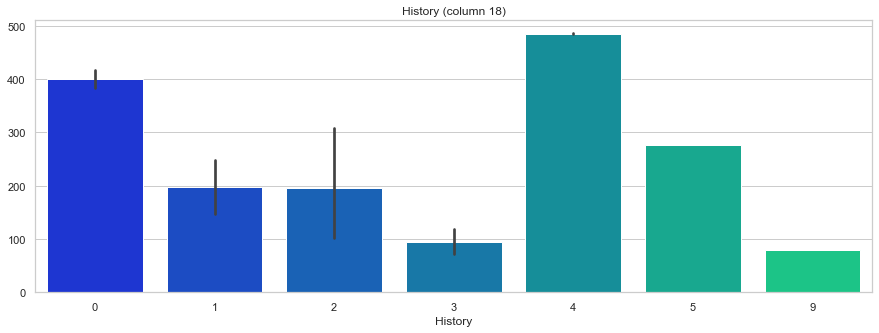

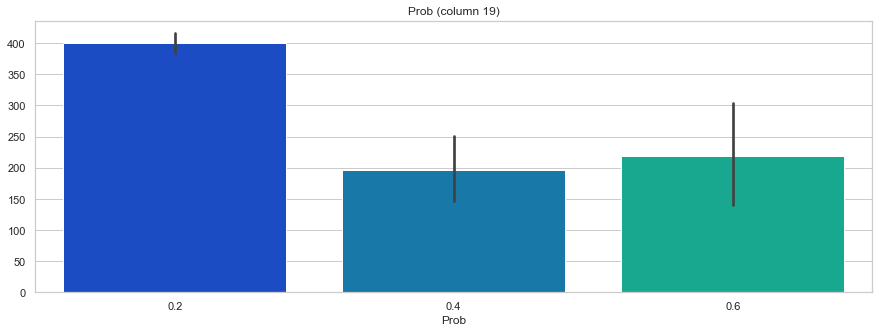

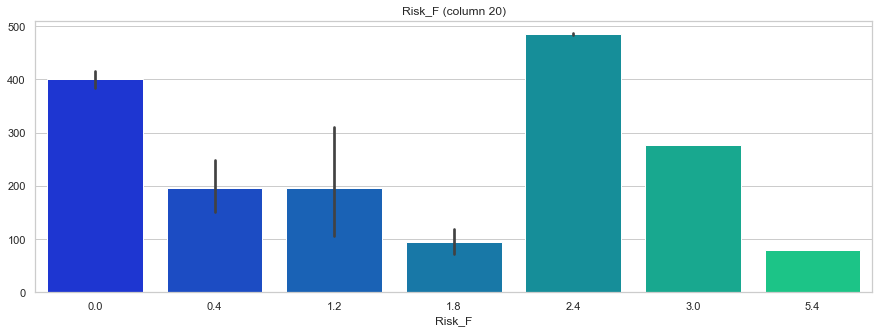

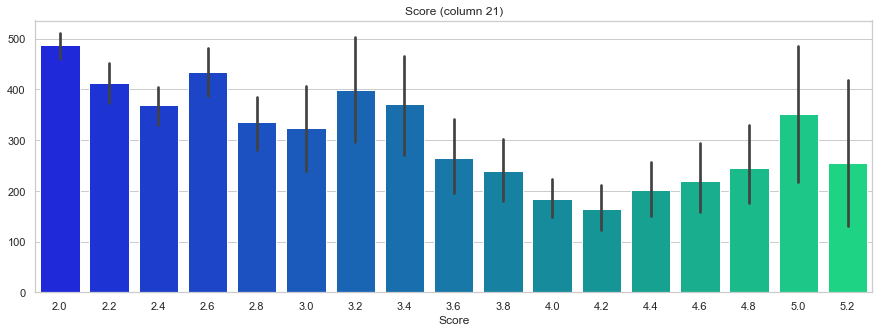

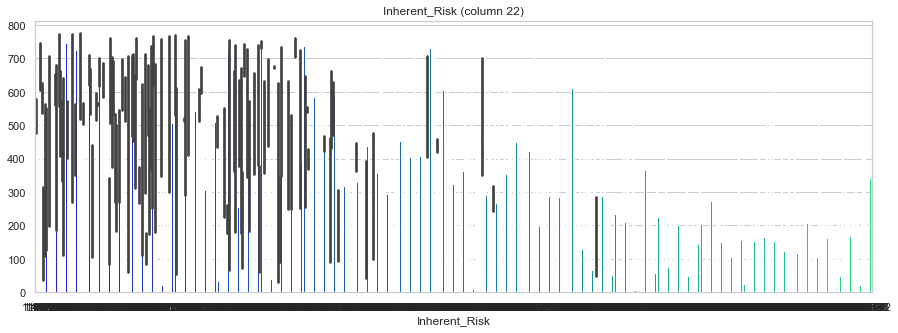

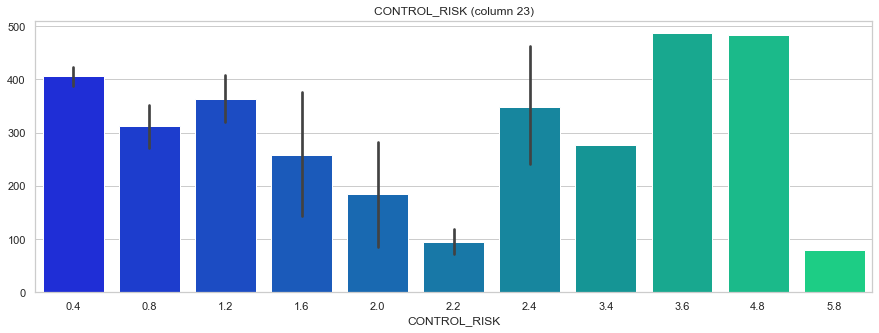

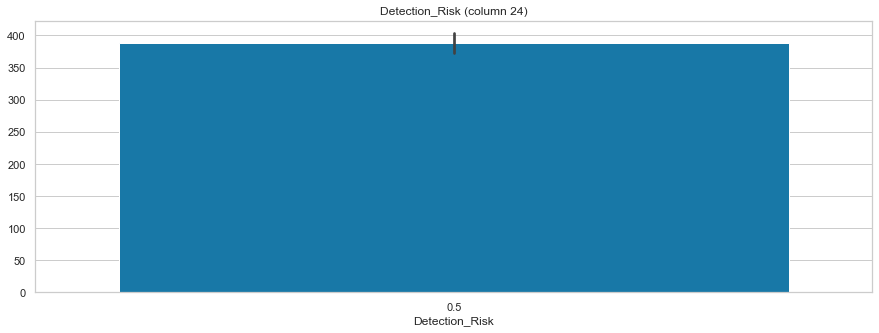

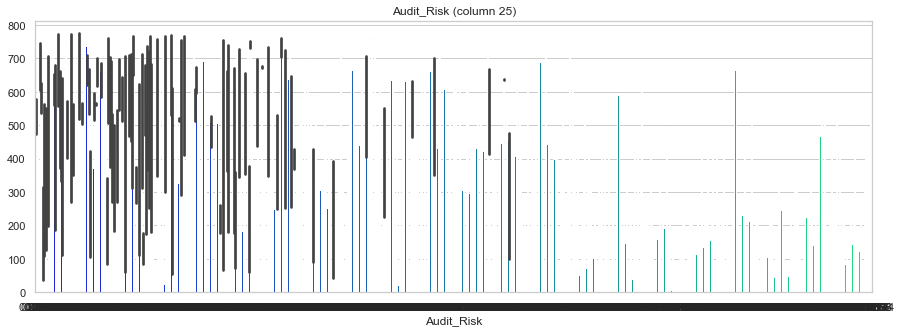

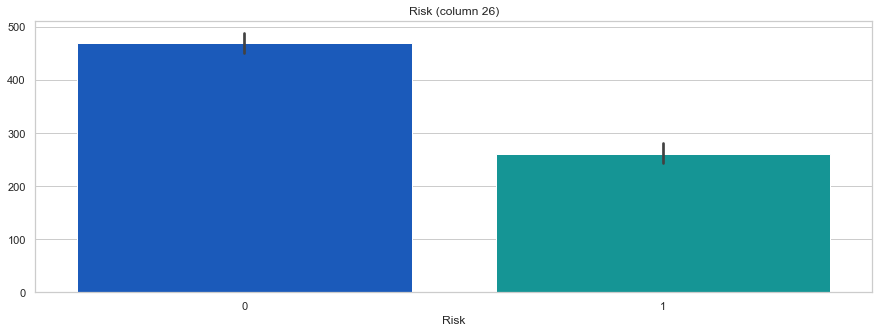

In [8]:
def his_diag(ds, l, w):
    for i in range(len(list(df))):
        columnNames = list(df)
        
        c = ds.iloc[:, i]
        sns.set_theme(style="whitegrid")
        ax = plt.subplots(figsize = (l, w))
        
        ax = sns.barplot(x = c, y = c.index, palette = 'winter')
        plt.title(f'{columnNames[i]} (column {i})')
        plt.show()
        
        
his_diag(df, 15, 5)

In [9]:
x

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880


In [10]:
y

0      1
1      0
2      0
3      1
4      0
      ..
771    0
772    0
773    0
774    0
775    0
Name: Risk, Length: 776, dtype: int64

In [11]:
from sklearn import preprocessing

def preprocess_df(df):
    
    one_hot = pd.get_dummies(df['LOCATION_ID'])
    df = df.drop('LOCATION_ID', axis = 1)
    df = df.join(one_hot)
    df 
    
    x = df.drop('Risk', axis=1)
    y = df['Risk']
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    scaler = preprocessing.StandardScaler()
    scaler.fit(x_train)
    
    
    x_train = pd.DataFrame(scaler.transform(x_train), index=x_train.index, 
                           columns=x_train.columns)
    x_test = pd.DataFrame(scaler.transform(x_test), index=x_test.index, 
                          columns=x_test.columns)
    
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = preprocess_df(df)

In [12]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 593 to 272
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    620 non-null    float64
 1   PARA_A          620 non-null    float64
 2   Score_A         620 non-null    float64
 3   Risk_A          620 non-null    float64
 4   PARA_B          620 non-null    float64
 5   Score_B         620 non-null    float64
 6   Risk_B          620 non-null    float64
 7   TOTAL           620 non-null    float64
 8   numbers         620 non-null    float64
 9   Score_B.1       620 non-null    float64
 10  Risk_C          620 non-null    float64
 11  Money_Value     620 non-null    float64
 12  Score_MV        620 non-null    float64
 13  Risk_D          620 non-null    float64
 14  District_Loss   620 non-null    float64
 15  PROB            620 non-null    float64
 16  RiSk_E          620 non-null    float64
 17  History         620 non-null    f

In [13]:
x_train

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,43,44,5,6,7,8,9,LOHARU,NUH,SAFIDON
593,1.475696,0.031762,1.412381,0.071357,-0.174845,1.690044,-0.164648,-0.150388,-0.248282,-0.289712,...,-0.106861,-0.040193,-0.240874,-0.217479,-0.056888,-0.327327,3.663141,-0.040193,-0.040193,-0.040193
44,-0.662224,-0.215740,0.263200,-0.261299,-0.415197,-0.667273,-0.404308,-0.415783,-0.248282,-0.289712,...,-0.106861,-0.040193,-0.240874,-0.217479,-0.056888,-0.327327,-0.272990,-0.040193,-0.040193,-0.040193
361,-0.740824,-0.154879,0.263200,-0.221220,-0.415197,-0.667273,-0.404308,-0.403970,-0.248282,-0.289712,...,-0.106861,-0.040193,-0.240874,-0.217479,-0.056888,-0.327327,-0.272990,-0.040193,-0.040193,-0.040193
156,-0.682080,1.985403,1.412381,2.001161,1.631283,1.690044,1.636278,1.862121,3.416830,4.631426,...,-0.106861,-0.040193,-0.240874,-0.217479,-0.056888,-0.327327,-0.272990,-0.040193,-0.040193,-0.040193
138,-0.682080,2.076694,1.412381,2.091339,3.070785,1.690044,3.071635,3.181612,1.584274,2.170857,...,-0.106861,-0.040193,-0.240874,-0.217479,-0.056888,-0.327327,-0.272990,-0.040193,-0.040193,-0.040193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,-0.662224,-0.483528,-0.885982,-0.437647,-0.345094,-0.667273,-0.381008,-0.404364,-0.248282,-0.289712,...,-0.106861,-0.040193,-0.240874,-0.217479,-0.056888,-0.327327,3.663141,-0.040193,-0.040193,-0.040193
391,-0.746615,1.246955,1.412381,1.271723,-0.408230,-0.667273,-0.401992,-0.125582,-0.248282,-0.289712,...,-0.106861,-0.040193,-0.240874,4.598136,-0.056888,-0.327327,-0.272990,-0.040193,-0.040193,-0.040193
743,1.475696,-0.483528,-0.885982,-0.437647,-0.364688,0.511386,-0.370732,-0.422083,-0.248282,-0.289712,...,-0.106861,-0.040193,-0.240874,-0.217479,-0.056888,-0.327327,-0.272990,-0.040193,-0.040193,-0.040193
745,1.475696,-0.268486,0.263200,-0.296034,-0.345530,0.511386,-0.357997,-0.363019,-0.248282,-0.289712,...,-0.106861,-0.040193,-0.240874,-0.217479,-0.056888,-0.327327,-0.272990,-0.040193,-0.040193,-0.040193


In [14]:
y_train

593    1
44     0
361    1
156    1
138    1
      ..
53     0
391    1
743    0
745    1
272    1
Name: Risk, Length: 620, dtype: int64

In [15]:
def c_matraix(model):
    model_pred = model.predict(x_test)
    cm = tf.math.confusion_matrix(
        y_test, model_pred, num_classes=2
    )
    ax = sns.heatmap(cm, cmap="YlGnBu",annot=True,fmt="d")
    plt.xlabel('predicted value')
    plt.ylabel('true value')

Accuracy of Logistic Regression Model = 94.872%


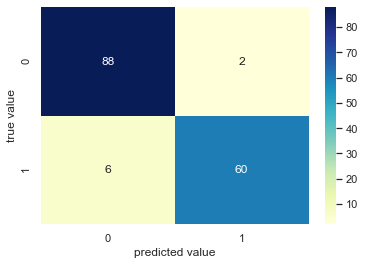

In [16]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)
print(f"Accuracy of Logistic Regression Model = {(LR_model.score(x_test, y_test) * 100):.3f}%")

c_matraix(LR_model)

Accuracy of K-Nearest Neighbors Model = 83.333%


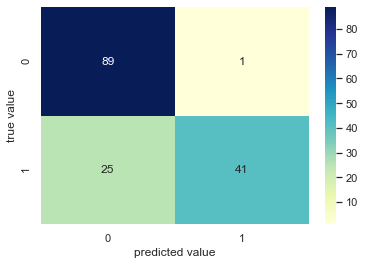

In [17]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train, y_train)
print(f"Accuracy of K-Nearest Neighbors Model = {(KNN_model.score(x_test, y_test) * 100):.3f}%")

c_matraix(KNN_model)

Accuracy of Decision Tree Model = 100.000%


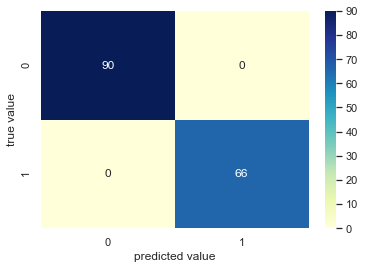

In [18]:
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train, y_train)
print(f"Accuracy of Decision Tree Model = {(DT_model.score(x_test, y_test) * 100):.3f}%")

c_matraix(DT_model)

In [19]:
num_classes = len(list(x_train))
from tensorflow.keras import regularizers

inputs = keras.Input(shape = (None, num_classes))

x = layers.Dense(512, activation = 'tanh',
                 kernel_regularizer=regularizers.L2(0.02)
                )(inputs)



x = layers.Dropout(0.2)(x)

predictions = layers.Dense(1, activation="sigmoid")(x)

ANN_model = Model(inputs = inputs, outputs = predictions)

ANN_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 70)]        0         
_________________________________________________________________
dense (Dense)                (None, None, 512)         36352     
_________________________________________________________________
dropout (Dropout)            (None, None, 512)         0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           513       
Total params: 36,865
Trainable params: 36,865
Non-trainable params: 0
_________________________________________________________________


In [20]:
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.losses import BinaryCrossentropy

ANN_model.compile(loss=BinaryCrossentropy(),
              optimizer=Adamax(0.01),
              metrics=['accuracy'])



ANN_model_history = ANN_model.fit(x_train, y_train,
                                  epochs=50,
                                  validation_split=0.25,
                                  verbose=1)

Epoch 1/50
15/15 [==============================] - 2s 78ms/step - loss: 1.9095 - accuracy: 0.7959 - val_loss: 0.4765 - val_accuracy: 0.9742
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.4169 - accuracy: 0.9687 - val_loss: 0.2545 - val_accuracy: 0.9677
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.2183 - accuracy: 0.9825 - val_loss: 0.1618 - val_accuracy: 0.9742
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1447 - accuracy: 0.9847 - val_loss: 0.1523 - val_accuracy: 0.9806
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.1285 - accuracy: 0.9921 - val_loss: 0.1194 - val_accuracy: 0.9742
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1047 - accuracy: 0.9893 - val_loss: 0.1169 - val_accuracy: 0.9742
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1112 - accuracy: 0.9838 - val_loss: 0.1058 - val_accuracy: 0.9871
Epoch 8/50
15/15 [=

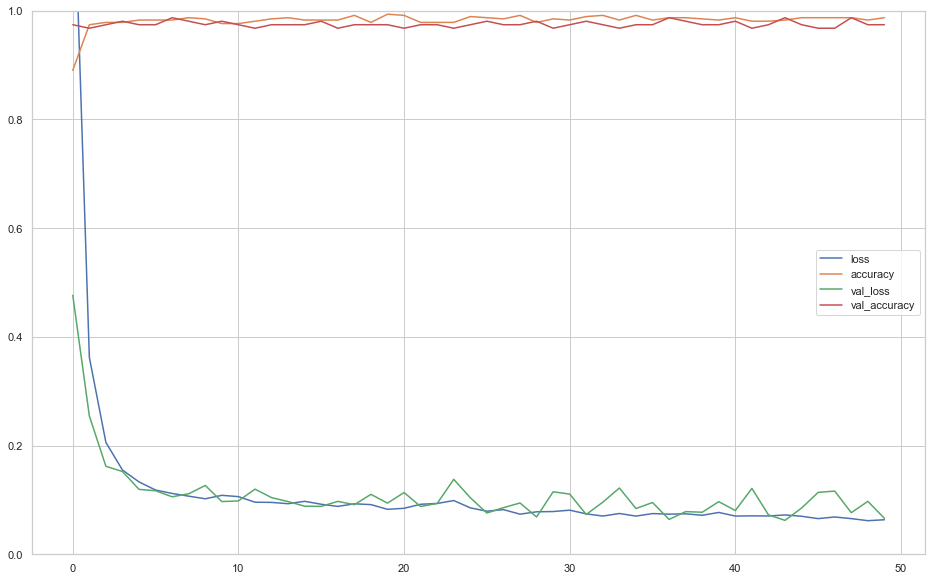

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(ANN_model_history.history).plot(figsize=(16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
loss_value, acc = ANN_model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.1431 - accuracy: 0.9423


Test Accuracy: 94.231%
Loss: 0.143%


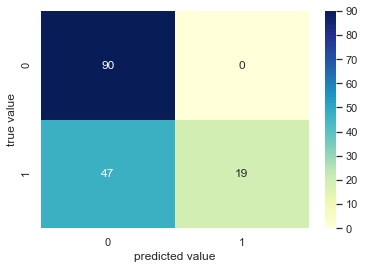

In [23]:
print(f"Test Accuracy: {(acc*100):.3f}%")
print(f"Loss: {loss_value:.3f}%")

c_matraix(ANN_model)

In [24]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()